In [1]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/totalwithmaininfo.csv',sep=',')
df = df.drop(df.columns[0],axis=1)

In [4]:
#y = df['Y'].values
#X = df.drop(['Y'], axis = 1)
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=30)

In [5]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [6]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [7]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [8]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [9]:
def average(y_pred):
  for i in range(len(y_pred)):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else:
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

## 1. Logistic Regression

In [10]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_1 = clf.predict(X_test)
y_pred_1 = average(y_pred_1)
y_score_1 = clf.predict_proba(X_test)[:,1]
acc1 = accuracy_score(y_test, y_pred_1)
f1_score_1 = metrics.f1_score(y_test, y_pred_1)
roc_1 = metrics.roc_auc_score(y_test, y_score_1)
print([acc1,f1_score_1,roc_1])
print(confusion_matrix(y_test, y_pred_1))

[0.7233333333333334, 0.7077464788732396, 0.7668416666666668]
[[932 268]
 [396 804]]


## 2. Naive Bayes

In [11]:
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
pred_NB = clf_NB.predict(X_test)
pred_NB = average(pred_NB)
y_score_2 = clf_NB.predict_proba(X_test)[:,1]
acc2 = accuracy_score(y_test, pred_NB)
f1_score_2 = metrics.f1_score(y_test, pred_NB)
roc_2 = metrics.roc_auc_score(y_test, y_score_2)
print([acc2,f1_score_2,roc_2])
print(confusion_matrix(y_test, pred_NB))

[0.6275, 0.6902286902286903, 0.5916055555555556]
[[510 690]
 [204 996]]


## 3. KNN

In [12]:
acc3_list = []
f1_score3_list = []
roc_3_list = []
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_3 = neigh.predict_proba(X_test)[:,1]
    acc3_list.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_3))

In [13]:
acc3_list.index(max(acc3_list))+1

6

In [14]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list.index(max(acc3_list))+1)
neigh.fit(X_train, y_train)
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_3 = neigh.predict_proba(X_test)[:,1]
acc3 = accuracy_score(y_test, pred_KN)
f1_score_3 = metrics.f1_score(y_test, pred_KN)
roc_3 = metrics.roc_auc_score(y_test, y_score_3)
print([acc3,f1_score_3,roc_3])
print(confusion_matrix(y_test, pred_KN))

[0.7175, 0.6319218241042345, 0.7456756944444444]
[[1140   60]
 [ 618  582]]


## 4. MLP

In [15]:
from sklearn.neural_network import MLPClassifier

F1_score_4_list = []
acc4_list = []
roc_4_list = []
mlp = []

hidden_units = [10,20,30,40,50,60,70]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']
for j in activation:
    for i in optimizer:
        for k in hidden_units:
              clf_MLP = MLPClassifier(hidden_layer_sizes= k, activation =  j, solver= i)
              clf_MLP.fit(X_train, y_train)
              pred_MLP = clf_MLP.predict(X_test)
              pred_MLP = average(pred_MLP)
              y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
              acc4_list.append(accuracy_score(y_test,pred_MLP))
              roc_4_list.append(metrics.roc_auc_score(y_test, y_score_4))
              F1_score_4_list.append(metrics.f1_score(y_test, pred_MLP))
              mlp.append([j,i,k])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [16]:
print("Best Accuracy: ", max(acc4_list))
min_index = acc4_list.index(max(acc4_list))
print("Best Combination:", mlp[min_index])

Best Accuracy:  0.7233333333333334
Best Combination: ['relu', 'sgd', 10]


In [17]:
clf_MLP = MLPClassifier(hidden_layer_sizes= mlp[min_index][2], activation =  mlp[min_index][0], solver= mlp[min_index][1])
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
pred_MLP = average(pred_MLP)
y_score_4 = clf_MLP.predict_proba(X_test)[:,1]
acc4 = accuracy_score(y_test,pred_MLP)
f1_score_4 = metrics.f1_score(y_test, pred_MLP)
roc_4 = metrics.roc_auc_score(y_test, y_score_4)
print([acc4,f1_score_4,roc_4])
print(confusion_matrix(y_test, pred_MLP))

[0.71, 0.7100000000000001, 0.7580416666666666]
[[852 348]
 [348 852]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 5. Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
acc5=[]
max_depth = []
for i in [2,3,4,5,6,7,8,9,10]:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth = i)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    acc5.append(accuracy_score(pred_DT, y_test))
    max_depth.append(i)
print (max(acc5))

0.7191666666666666


In [19]:
 best_depth = max_depth[acc5.index(max(acc5))]

In [20]:
 best_depth

5

In [21]:
clf_DT = DecisionTreeClassifier(random_state=0, max_depth = best_depth)
clf_DT.fit(X_train, y_train)
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_5 = clf_DT.predict_proba(X_test)[:,1]
acc5 = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT)
roc_5 = metrics.roc_auc_score(y_test, y_score_5)
print([acc5,f1_score_5,roc_5])
print(confusion_matrix(y_test, pred_DT))

[0.7191666666666666, 0.7107296137339055, 0.7717645833333333]
[[898 302]
 [372 828]]


## 6. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
acc6=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train)
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc6.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc6))

0.6766666666666666


In [23]:
best_depth_6 = max_depth[acc6.index(max(acc6))]

In [24]:
best_depth_6

7

In [25]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train)
pred_RF = clf_RF.predict(X_test)
pred_RF = average(pred_RF)
y_score_6 = clf_RF.predict_proba(X_test)[:,1]
acc6 = accuracy_score(y_test, pred_RF)
f1_score_6 = metrics.f1_score(y_test, pred_RF)
roc_6 = metrics.roc_auc_score(y_test, y_score_6)
print([acc6,f1_score_6,roc_6])
print(confusion_matrix(y_test, pred_RF))

feature_importances = pd.DataFrame(clf_RF.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

[0.6783333333333333, 0.7465528562048588, 0.8216611111111112]
[[ 491  709]
 [  63 1137]]


In [26]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier()
clf_XGB.fit(X_train, y_train)
pred_XGB = clf_XGB.predict(X_test)
pred_XGB = average(pred_XGB)
y_score_8 = clf_XGB.predict_proba(X_test)[:,1]
acc8 = accuracy_score(y_test,pred_XGB)
f1_score_8 = metrics.f1_score(y_test, pred_XGB)
roc_8 = metrics.roc_auc_score(y_test, y_score_8)
print([acc8,f1_score_8,roc_8])
print(confusion_matrix(y_test, pred_XGB))

[0.7208333333333333, 0.7436878347360367, 0.8259854166666667]
[[758 442]
 [228 972]]


In [27]:
feature_importances

,importance
MAR_N,0.253711
MAR,0.196461
MOE_N,0.142398
MOE,0.112398
Circularity,0.105215
EAR_N,0.072584
Circularity_N,0.065470
EAR,0.051762


In [28]:
X_train_shaped = np.expand_dims(X_train, axis=2)

In [29]:
X_train_shaped.shape

(8160, 8, 1)

In [30]:
X_test_shaped = np.expand_dims(X_test, axis=2)

In [31]:
X_test_shaped.shape

(2400, 8, 1)

In [32]:
pip install keras

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Epoch 1/100
255/255 [==============================] - 10s 11ms/step - loss: 0.5789 - accuracy: 0.6964 - val_loss: 0.7508 - val_accuracy: 0.6083
Epoch 2/100
255/255 [==============================] - 3s 10ms/step - loss: 0.4842 - accuracy: 0.7653 - val_loss: 0.6425 - val_accuracy: 0.6450
Epoch 3/100
255/255 [==============================] - 2s 7ms/step - loss: 0.4384 - accuracy: 0.7939 - val_loss: 0.5978 - val_accuracy: 0.6017
Epoch 4/100
255/255 [==============================] - 2s 7ms/step - loss: 0.4108 - accuracy: 0.8105 - val_loss: 0.6256 - val_accuracy: 0.6658
Epoch 5/100
255/255 [==============================] - 2s 7ms/step - loss: 0.4014 - accuracy: 0.8125 - val_loss: 0.6167 - val_accuracy: 0.6425
Epoch 6/100
255/255 [==============================] - 2s 7ms/step - loss: 0.3872 - accuracy: 0.8189 - val_loss: 0.6525 - val_accuracy: 0.6758
Epoch 7/100
255/255 [==============================] - 2s 6ms/step - loss: 0.3837 - accuracy: 0.8205 - val_loss: 0.5948 - val_accuracy: 0.6

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             256       
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 32)                12320     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13121 (51.25 KB)
Trainable params: 13121 (

In [35]:
pred_cnn = model.predict(X_test_shaped)
pred_cnn = np.argmax(pred_cnn, axis=-1)
y_score_7 = model.predict(X_test_shaped)

acc7 = accuracy_score(y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(y_test, pred_cnn)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_cnn))

75/75 [==============================] - 0s 2ms/step
[0.5, 0.0, 0.7443777777777779]
[[1200    0]
 [1200    0]]


,Accuracy
Model,
Logistic Regression,0.723333
Naive Bayes,0.627500
KNN,0.717500
MLP,0.710000
Decision Tree,0.719167
Random Forest,0.678333
CNN,0.500000
XGB Boosting,0.720833


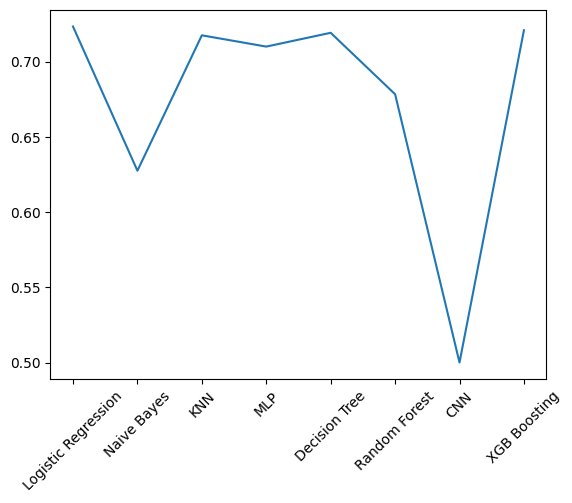

In [36]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN', 'MLP','Decision Tree','Random Forest', 'CNN', 'XGB Boosting'],
        'Accuracy':[acc1,acc2, acc3, acc4, acc5,acc6,acc7, acc8]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total

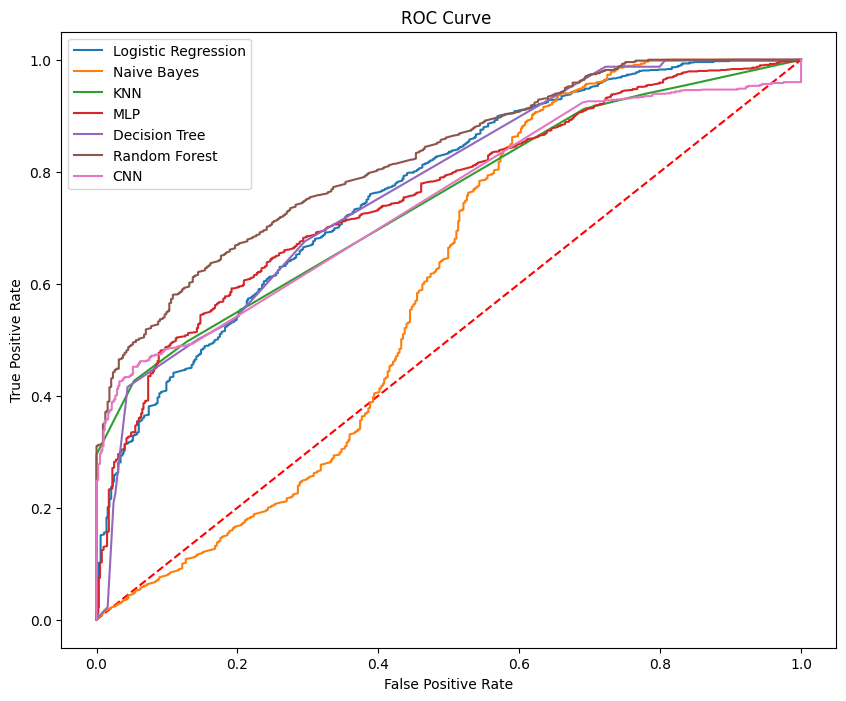

In [52]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_score_1)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_score_2)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_3)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_4)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_5)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_6)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_7)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "MLP")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

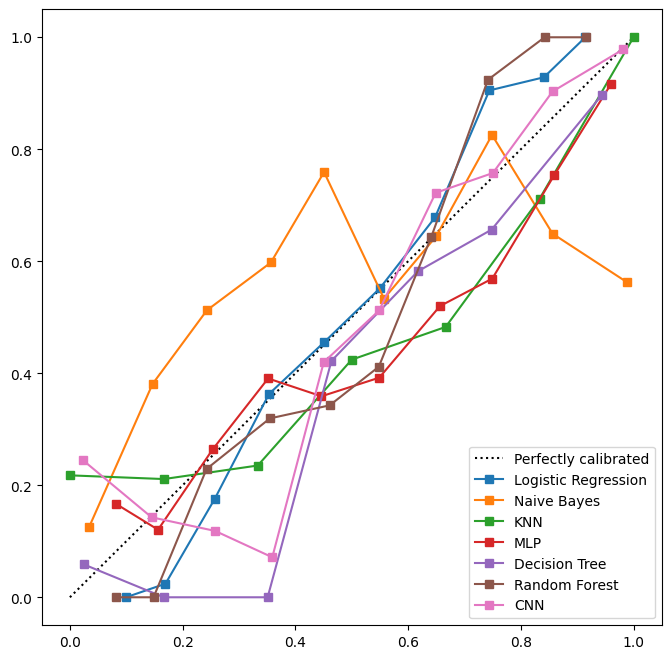

In [38]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_1,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_2,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_3,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_4,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'MLP')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_5,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_6,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_7,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")